# Connect to drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/FDS_project

/content/drive/.shortcut-targets-by-id/1WCkQ1nvUvZwx3y6hcnVWHP2Ln7_9a9Fz/FDS_project


# Librerie

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import pandas as pd
import numpy as np

# Inspect the dataset

In [ ]:
# import the dataset

df = pd.read_csv('/content/drive/MyDrive/FDS_project/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_solution = df.pivot_table(index=['ever_married', 'stroke'], aggfunc='size')

In [ ]:
df_solution

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
dtype: int64

Controlliamo se ci sono missing value

In [ ]:
# inspect the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only the column "bmi" has nan value.

We will fill it with the mean

In [ ]:
# fill the nan value with the mean
df['bmi'] = df['bmi'].fillna(round(df.bmi.mean(),1))

# Some correlation

Supponiamo di star lavorando con un ospedale e vogliamo predirre se i pazienti avranno un ictus, e abbiamo un dataset dei pazienti li dentro e vogliamo vedere se il dataset è abbastanza buono per predirre l'icuts si o no, secondo delle linee guida date dai medici:

```
https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

https://www.humanitas.it/malattie/ictus-cerebrale/

```
Infatti il 75% dei casi di ICTUS colpisce le persone con più di 65 anni.

L’incidenza è proporzionale all’età della popolazione: è bassa fino a 40-45 anni, poi aumenta gradualmente per impennarsi dopo i 70 anni.

Tra i fattori di rischio non modificabili:

età;
sesso;

malattie cardiache

obesità

ipertensione arteriosa

In [ ]:
# Take only the dataset with stroke = 1
dfStrocke = df[df['stroke'] == 1].copy()

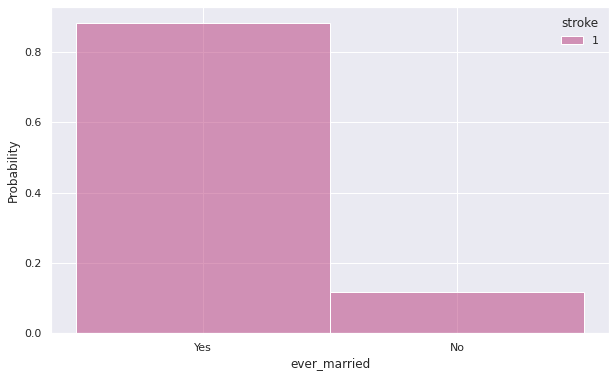

In [ ]:
# set size of sbn figure 
sns.set(rc = {'figure.figsize':(10,6)})
sns.histplot(data = dfStrocke, x='ever_married', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

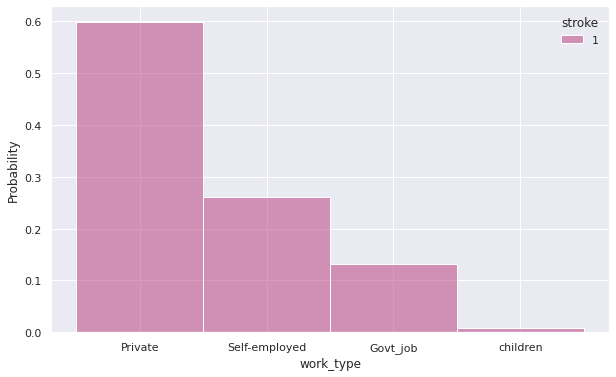

In [ ]:
sns.histplot(data = dfStrocke, x='work_type', hue='stroke', stat = 'probability', palette = 'magma')
plt.show()

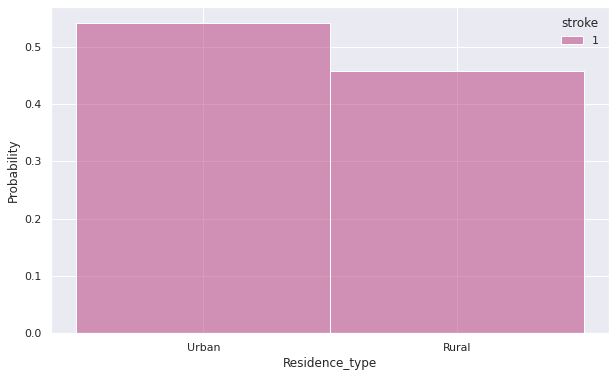

In [ ]:
sns.histplot(data = dfStrocke, x='Residence_type', hue='stroke', bins = 2, stat = 'probability', palette = 'magma')
plt.show()

inutile

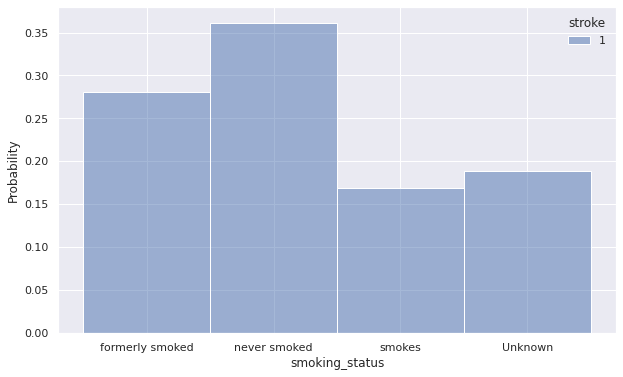

In [ ]:
sns.histplot(data = dfStrocke, x='smoking_status', hue='stroke', stat = 'probability')
plt.show()

We can see that the % of pearson with unknown status of smoking is high relately to the number of pearson who had a stroke.

In [ ]:
unknownSmoke = round(sum((dfStrocke['smoking_status'] == 'Unknown'))/dfStrocke.shape[0] * 100, 2)
unknownSmoke

18.88

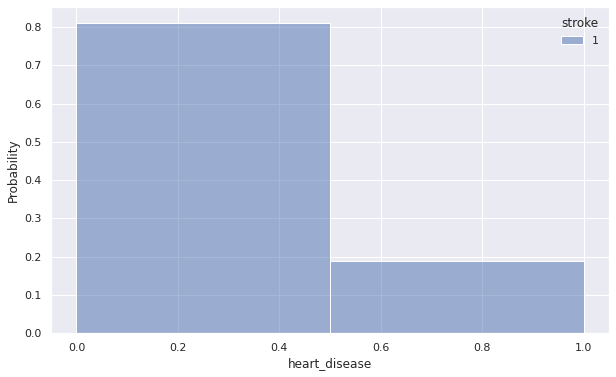

In [ ]:
sns.histplot(data = dfStrocke, x='heart_disease', hue='stroke', bins = 2, stat = 'probability')
plt.show()

Il dataset rispecchia i dati dai siti mediciosi?
si/no spiega

### ScatterPlot

In [ ]:
print('stroke: ',len(df[df['stroke']==1]))
print('no stroke: ',len(df[df['stroke']==0]))

stroke:  249
no stroke:  4861


In [ ]:
stroke1 = df[df['stroke'] == 1].head(240).copy()
stroke0 = df[df['stroke'] == 0].head(200).copy()
strokee = pd.concat([stroke1, stroke0])

In [ ]:
features = (strokee[['age', 'avg_glucose_level', 'bmi', 'stroke']].T).copy()
features = np.array(features, dtype = np.float64)

In [ ]:
print(min(features[1]), max(features[1]))

55.39 271.74


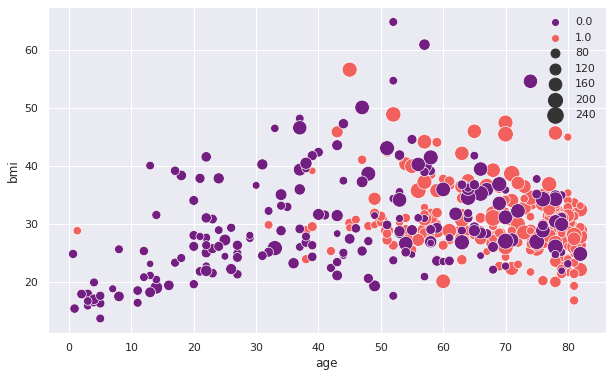

In [ ]:
sns.scatterplot(x = features[0], y = features[2],
             size = features[1], sizes = (55,272), hue = features[3], palette = 'magma')
plt.xlabel('age')
plt.ylabel('bmi');

AGE: >40/50 

BMI: >20

Glucosio alto nei vecchi e bmi alto e chi ha ictus

# Standardize my data and fixing it

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df[cols])

df_norm = df.copy()
df_norm[cols] = pd.DataFrame(norm)

In [ ]:
df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001199,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,0.000844,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.468543,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.715384,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.635746,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,0.000844,never smoked,0
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.442915,never smoked,0
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.221702,never smoked,0
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.427880,formerly smoked,0


Residence type, ever_married and gender are one hot encoder 0/1, no need to double the columns

In [ ]:
# GENDER: F/M --> 1/0
df_norm.drop(df_norm.loc[df['gender'] =='Other'].index, inplace=True)
df_norm["gender"] = df_norm["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
df_norm["ever_married"] = df_norm["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
df_norm["Residence_type"] = df_norm["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [ ]:
df_norm.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.051434,0,1,1,Private,1,2.706375,1.001199,formerly smoked,1
1,51676,1,0.786070,0,0,1,Self-employed,0,2.121559,0.000844,never smoked,1
2,31112,0,1.626390,0,1,1,Private,0,-0.005028,0.468543,never smoked,1
3,60182,1,0.255342,0,0,1,Private,1,1.437358,0.715384,smokes,1
4,1665,1,1.582163,1,0,1,Self-employed,0,1.501184,-0.635746,never smoked,1


# Train-Test split

Dropping columns and separate Design matrix from target

In [ ]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [ ]:
def norm_X(X_total):
  # transform the dataframe in dictionary to perform feature extraction
  X_total = X_total.to_dict('records')
  
  v = DictVectorizer(sparse = False, dtype = float)
  X_total = v.fit_transform(X_total)
  return X_total

In [ ]:
X_to_split = norm_X(X)

In [ ]:
# see the transformation of X, the whole dataset
pd.DataFrame(X_to_split, columns = v.get_feature_names_out() )

In [ ]:
# split the data with 60% in each set
X_train, X_test, y_train, y_test = train_test_split(X_to_split, y, random_state=0,
                                  train_size = 0.6)

In [ ]:
#def norm_X_train_and(X_tr, X_te):
  # transform the dataframe in dictionary to perform feature extraction
  X_tr = X_tr.to_dict('records')
  X_te = X_te.to_dict('records')
  v = DictVectorizer(sparse = False, dtype = float)
  X_tr = v.fit_transform(X_tr)
  X_te = v.transform(X_te)
  return X_tr, X_te

In [ ]:
#X_train, X_test = norm_X_train_and_test(X_train, X_test)

# k-neighbors method

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X_train, y_train)
y_KN = model.predict(X_test)

Compare using confusion-matrix

In [ ]:
from sklearn.metrics import confusion_matrix

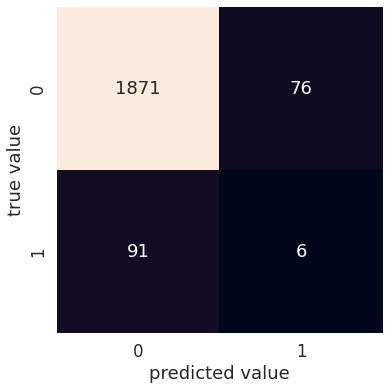

In [ ]:
mat = confusion_matrix(y_test, y_KN)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_KN)

0.9182974559686888

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train, y_train)
y_LR = clf.predict(X_test)

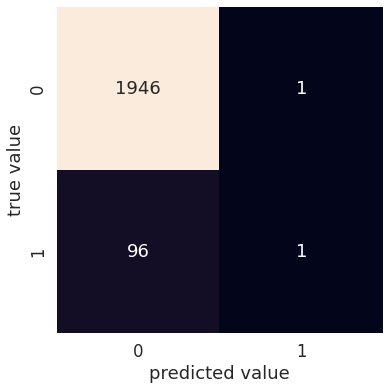

In [ ]:
mat = confusion_matrix(y_test, y_LR)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_LR)

0.9525440313111546

In [ ]:
mean_squared_error(y_test, y_LR)

0.0474559686888454

## Analysis with k-fold of logistic regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [ ]:
def apply_Logistic_Regression(X_tr, y_tr, X_te):
  clf = LogisticRegression(random_state=0)
  clf.fit(X_tr, y_tr)
  y_LR = clf.predict(X_te)
  return y_LR

In [ ]:
y = np.array(y)

In [ ]:
print(X_to_split.shape, y.shape, type(X_to_split), type(y))

(5109, 17) (5109,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Implement k-Fold

import warnings
warnings.filterwarnings("ignore")

# List of metrics averages
MSE_values = []
accuracy_values = []

# List of tuples (k, MSE_medio_k_esimo, accuracy_medio_k_esimo)
final_values = []

# Tune parameters
k_min = 5
k_max = 7
min_degree = 1
max_degree = 4

for k in tqdm(range(k_min, k_max + 1)):
  for degree in range(min_degree, max_degree + 1):
    kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)

    for train_index, test_index in kf.split(X_to_split):
      X_train, X_test = X_to_split[train_index], X_to_split[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Transform with polyfit
      poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
      X_train_poly = poly.fit_transform(X_train)
      X_test_poly = poly.transform(X_test)

      if np.sum(y_train) in [y_train.shape[0],0]:
        print(str(k) + " --> all one class")
      else:
        y_LR = apply_Logistic_Regression(X_tr=X_train_poly, y_tr=y_train, X_te=X_test_poly)
        MSE_values.append(mean_squared_error(y_test, y_LR))
        accuracy_values.append(accuracy_score(y_test, y_LR))
      # For each degree calculate the mean and add it
    mean_MSE = np.mean(MSE_values)
    mean_accuracy = np.mean(accuracy_values)
    final_values.append((k, degree, mean_MSE, mean_accuracy))
    # Risvuoto le liste
    MSE_values = []
    accuracy_values = []

  0%|          | 0/3 [00:00<?, ?it/s]

5 --> all one class
5 --> all one class
5 --> all one class
5 --> all one class


 33%|███▎      | 1/3 [00:19<00:38, 19.27s/it]

6 --> all one class
6 --> all one class
6 --> all one class
6 --> all one class


 67%|██████▋   | 2/3 [00:43<00:22, 22.35s/it]

7 --> all one class
7 --> all one class
7 --> all one class
7 --> all one class


100%|██████████| 3/3 [01:14<00:00, 24.75s/it]


In [ ]:
# Implement k-Fold

import warnings
warnings.filterwarnings("ignore")

# List of metrics averages
MSE_values = []
accuracy_values = []

# List of tuples (k, MSE_medio_k_esimo, accuracy_medio_k_esimo)
final_values = []

# Tune parameters
k_min = 2
k_max = 12
min_degree = 1
max_degree = 4

for k in tqdm(range(k_min, k_max + 1)):
  for degree in range(min_degree, max_degree + 1):
    kf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)

    for train_index, test_index in kf.split(X_to_split, y):
      X_train, X_test = X_to_split[train_index], X_to_split[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Transform with polyfit
      poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
      X_train_poly = poly.fit_transform(X_train)
      X_test_poly = poly.transform(X_test)

      y_LR = apply_Logistic_Regression(X_tr=X_train_poly, y_tr=y_train, X_te=X_test_poly)

      MSE_values.append(mean_squared_error(y_test, y_LR))
      accuracy_values.append(accuracy_score(y_test, y_LR))
      # For each degree calculate the mean and add it
    mean_MSE = np.mean(MSE_values)
    mean_accuracy = np.mean(accuracy_values)
    final_values.append((k, degree, mean_MSE, mean_accuracy))
    # Risvuoto le liste
    MSE_values = []
    accuracy_values = []

100%|██████████| 11/11 [06:26<00:00, 35.14s/it]


In [ ]:
final_values

[(2, 1, 0.04854163761384238, 0.9514583623861577),
 (2, 2, 0.05108635853049665, 0.9489136414695034),
 (2, 3, 0.06439643427982966, 0.9356035657201704),
 (2, 4, 0.0749664775104322, 0.9250335224895678),
 (3, 1, 0.048933255040125266, 0.9510667449598748),
 (3, 2, 0.05049911920140928, 0.9495008807985906),
 (3, 3, 0.06302603249168134, 0.9369739675083185),
 (3, 4, 0.07046388725778038, 0.9295361127422197),
 (4, 1, 0.04854164139102431, 0.9514583586089757),
 (4, 2, 0.051478058291452355, 0.9485219417085476),
 (4, 3, 0.05969953541837469, 0.9403004645816253),
 (4, 4, 0.06870149374450829, 0.9312985062554917),
 (5, 1, 0.04854168144120245, 0.9514583185587975),
 (5, 2, 0.049324268636519585, 0.9506757313634806),
 (5, 3, 0.060676478875129135, 0.9393235211248708),
 (5, 4, 0.06713747122559326, 0.9328625287744068),
 (6, 1, 0.04873742389051636, 0.9512625761094835),
 (6, 2, 0.05010790030692051, 0.9498920996930794),
 (6, 3, 0.057935154995779614, 0.9420648450042203),
 (6, 4, 0.06889689750987976, 0.931103102490120

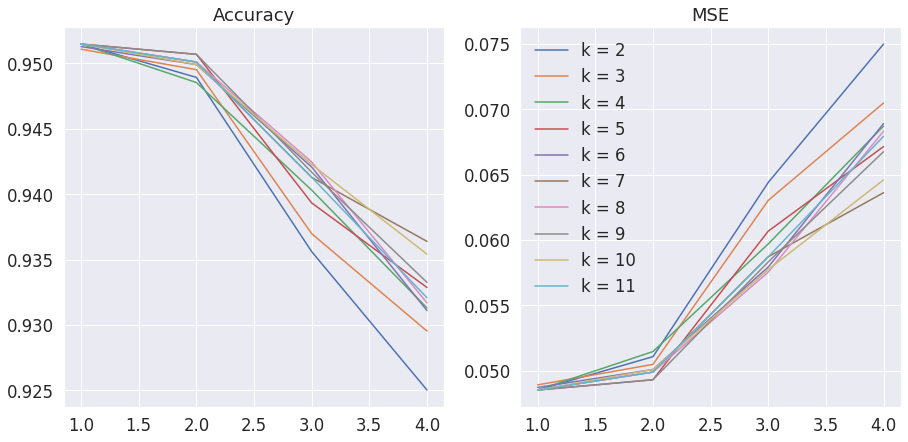

2 12


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15, 7))

# Lists with values
x_values = [tupla[1] for tupla in final_values]
mse_plot =  [tupla[2] for tupla in final_values]
accuracy_plot =  [tupla[3] for tupla in final_values]

# Plot the accuracy
j = 0
for _ in range(k_min, k_max):
  axs[0].plot(x_values[j:j+max_degree], accuracy_plot[j:j+max_degree])
  j += max_degree
axs[0].set_title("Accuracy")

# Plot the MSE
j = 0
for _ in range(k_min, k_max):
  axs[1].plot(x_values[j:j+max_degree], mse_plot[j:j+max_degree])
  j += max_degree
axs[1].set_title("MSE")

# Legend
legend_list = []
for l in range(k_min, k_max+1):
  legend_list.append(str('k = ' + str(l)))
plt.legend(legend_list, loc='upper left')

# Show
plt.show()

print(k_min, k_max)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train)
y_MNB = clf.predict(X_test)

In [ ]:
mat = confusion_matrix(y_test, y_MNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_MNB)

# Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
y_GNB = gnb.predict(X_test)

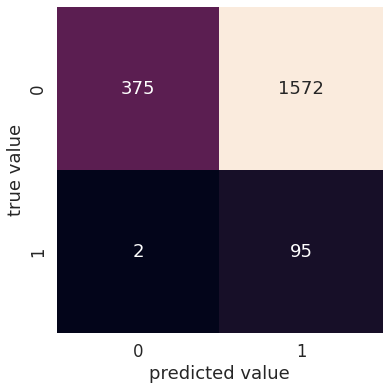

In [ ]:
mat = confusion_matrix(y_test, y_GNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
accuracy_score(y_test, y_GNB)

# Visualize the data using PCA


In [ ]:
dfplt = df.copy()

# GENDER: F/M --> 1/0
dfplt.drop(dfplt.loc[df['gender'] =='Other'].index, inplace=True)
dfplt["gender"] = dfplt["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
dfplt["ever_married"] = dfplt["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
dfplt["Residence_type"] = dfplt["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [ ]:
Xnot_norm = dfplt.drop(['id', 'stroke'], axis = 1)
Xplt = Xnot_norm.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
X_2D.shape

(5109, 2)

In [ ]:
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
sum(dfplt['stroke'] == 1)

249

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

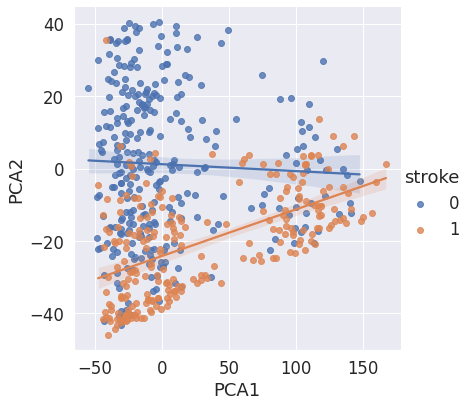

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

### Standardize dataset PCA plot visualitation

In [ ]:
X.shape

(5109, 10)

In [ ]:
Xplt = X.copy()
Xplt = Xplt.to_dict('records')
vplt = DictVectorizer(sparse = False, dtype = float)
Xplt = vplt.fit_transform(Xplt)

In [ ]:
from sklearn.decomposition import PCA     # 1. Choose the model class
PCAmodel = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
PCAmodel.fit(Xplt)                        # 3. Fit to data. Notice y is not specified!
X_2D = PCAmodel.transform(Xplt)           # 4. Transform the data to two dimensions

In [ ]:
dfplt = df_norm.copy()
dfplt['PCA1'] = X_2D[:, 0]
dfplt['PCA2'] = X_2D[:, 1]

In [ ]:
stroke1 = dfplt[dfplt['stroke'] == 1].head(240).copy()
stroke0 = dfplt[dfplt['stroke'] == 0].head(300).copy()
strokee = pd.concat([stroke1, stroke0])

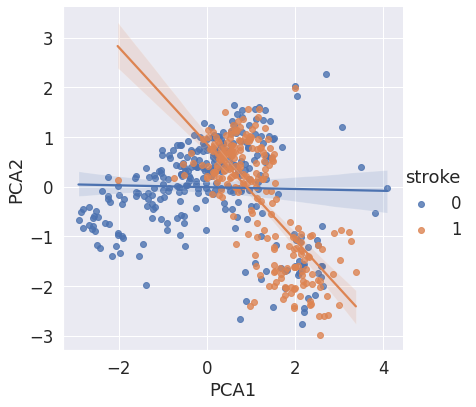

In [ ]:
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'stroke', data = strokee, fit_reg = True, height=6);

Chiedere quale PCA è meglio.